In [1]:
import os
import json

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-v0_8')

In [2]:
for i, path in enumerate(os.walk('export')):
    if i == 0:
        continue  # skip 'export' directory, only look at sub-directories
    print(path)

paths = list(os.walk('export'))[1:]
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

nrows = 6
ncols = 3

('export\\banknote-authentication', [], ['gen-0.json', 'gen-1.json', 'gen-10.json', 'gen-11.json', 'gen-12.json', 'gen-13.json', 'gen-14.json', 'gen-15.json', 'gen-16.json', 'gen-17.json', 'gen-18.json', 'gen-19.json', 'gen-2.json', 'gen-20.json', 'gen-21.json', 'gen-22.json', 'gen-23.json', 'gen-3.json', 'gen-4.json', 'gen-5.json', 'gen-6.json', 'gen-7.json', 'gen-8.json', 'gen-9.json', 'pareto.json'])
('export\\blood-transfusion-service-center', [], ['gen-0.json', 'gen-1.json', 'gen-10.json', 'gen-11.json', 'gen-12.json', 'gen-13.json', 'gen-14.json', 'gen-15.json', 'gen-16.json', 'gen-17.json', 'gen-18.json', 'gen-19.json', 'gen-2.json', 'gen-20.json', 'gen-21.json', 'gen-22.json', 'gen-23.json', 'gen-24.json', 'gen-25.json', 'gen-26.json', 'gen-27.json', 'gen-28.json', 'gen-29.json', 'gen-3.json', 'gen-30.json', 'gen-31.json', 'gen-32.json', 'gen-33.json', 'gen-34.json', 'gen-35.json', 'gen-36.json', 'gen-37.json', 'gen-38.json', 'gen-39.json', 'gen-4.json', 'gen-40.json', 'gen-41.

Plot (stop early set) losses of Pareto set

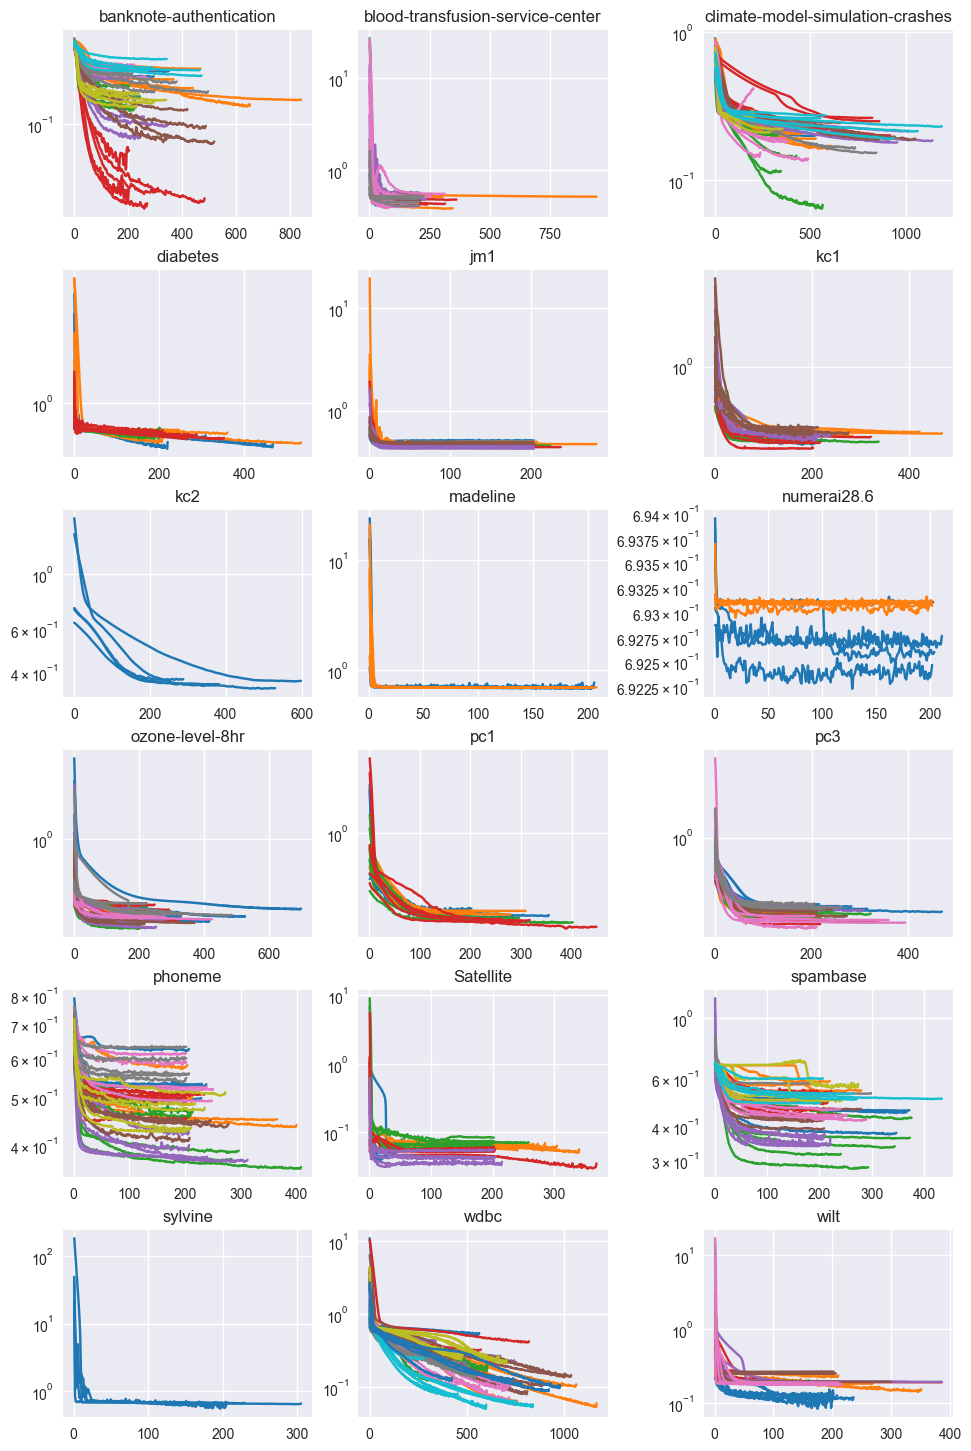

In [3]:
fig1, axs1 = plt.subplots(nrows=nrows, ncols=ncols)
for i, path in enumerate(paths):

    row = round(i // ncols)
    col = round(i % ncols)

    with open(os.path.join(path[0], 'pareto.json')) as f_pareto:
        pareto = json.load(f_pareto)

    for j, individual in enumerate(pareto['set']):
        losses = individual['metrics']['performance']['loss']

        for fold, loss_tuple in enumerate(losses):
            x = range(1, len(loss_tuple[1]) + 1)
            y = loss_tuple[1]

            axs1[row][col].plot(x, y, color=colours[j % len(colours)], label=f'Individual {j+1}')
    
    axs1[row][col].set_yscale('log')
    #axs1[row][col].set_xlabel('Epochs')
    #axs1[row][col].set_ylabel('Loss')
    #axs1[row][col].legend()
    axs1[row][col].set_title(path[0].split('\\')[1])

fig1.set_size_inches(6.4*ncols/2, 4.8*nrows/2)  # default is 6.4, 4.8, cf. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
fig1.set_layout_engine('compressed')

Plot (CV / val set) dominated hypervolumes of Pareto front

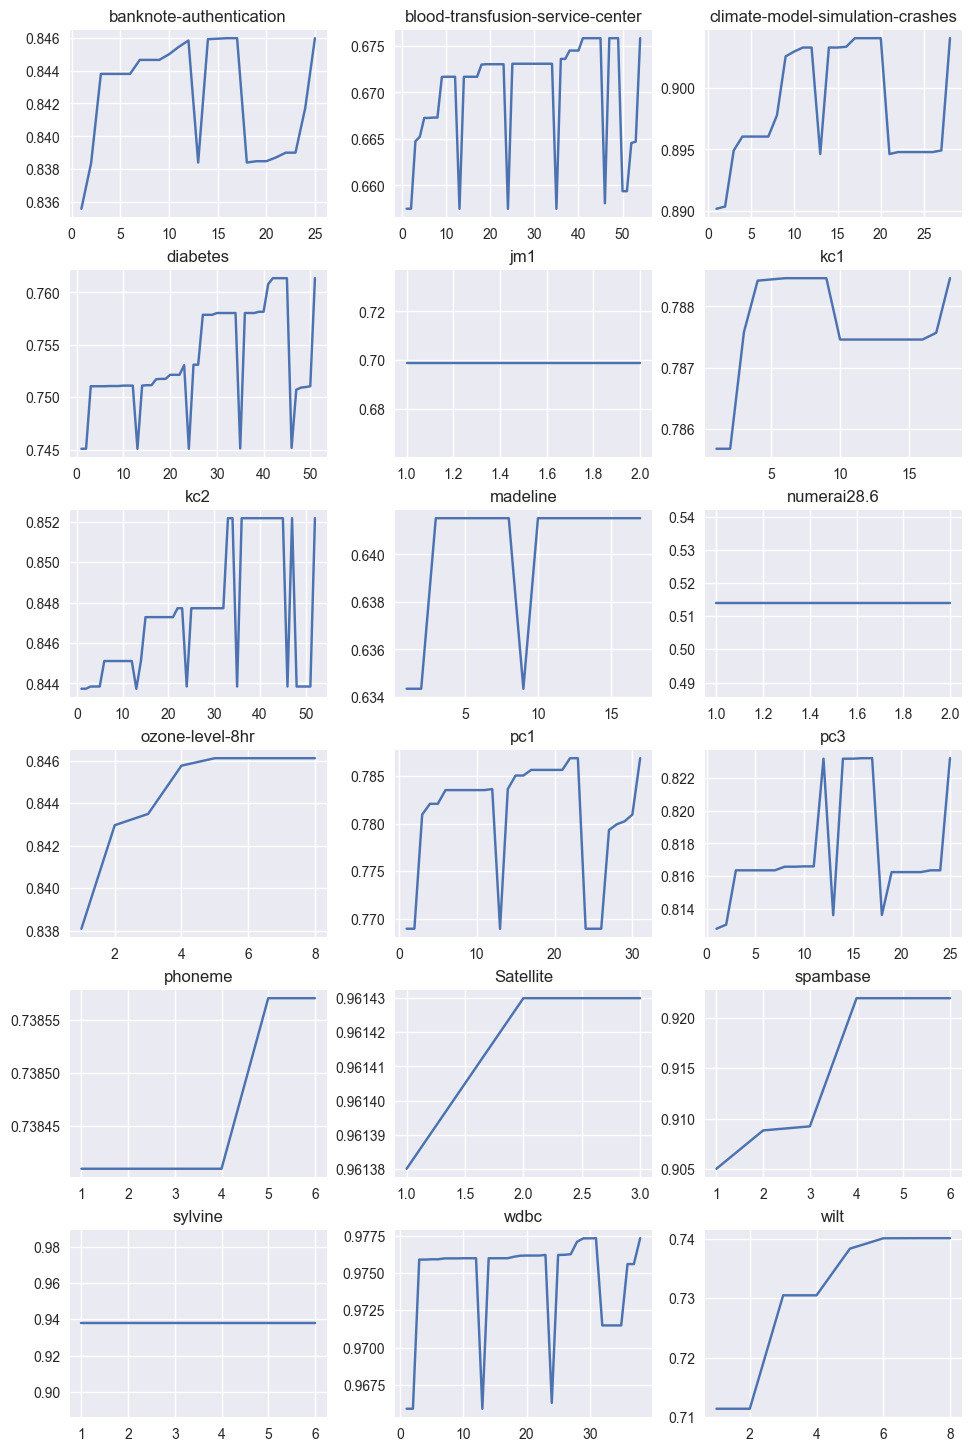

In [4]:
fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols)
for i, path in enumerate(paths):

    row = round(i // ncols)
    col = round(i % ncols)

    dhvs_val = list()
    for file_name in path[2]:
        with open(os.path.join(path[0], file_name)) as file:
            file_content = json.load(file)

        dhv_val = file_content['dhv_val']  # both gen-*.json and pareto.json files have this field
        dhvs_val.append(dhv_val)

    x = range(1, len(dhvs_val) + 1)
    axs2[row][col].plot(x, dhvs_val)
    #axs2[row][col].set_xlabel('Generations')
    #axs2[row][col].set_ylabel('Dominated Hypervolume')
    axs2[row][col].set_title(path[0].split('\\')[1])

fig2.set_size_inches(6.4*ncols/2, 4.8*nrows/2)  # default is 6.4, 4.8, cf. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
fig2.set_layout_engine('compressed')

Plot (test set) dominated hypervolumes of Pareto front of all datasets in one graph

Text(0, 0.5, 'Dominated Hypervolume')

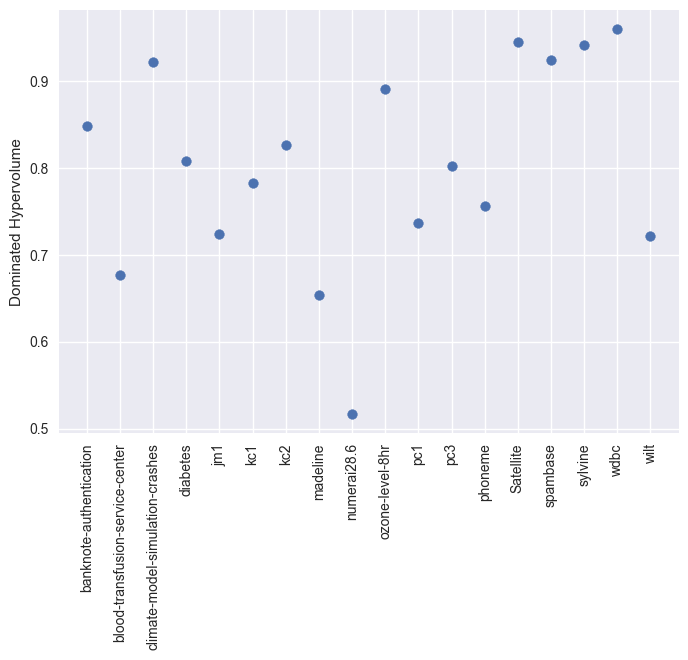

In [5]:
fig3, ax3 = plt.subplots()

dhvs_test = list()
dataset_names = list()
for i, path in enumerate(paths):

    with open(os.path.join(path[0], 'pareto.json')) as f_pareto:
        pareto = json.load(f_pareto)

    dhvs_test.append(pareto['dhv_test'])
    dataset_names.append(path[0].split('\\')[1])

ax3.scatter(dataset_names, dhvs_test, label='Dominated Hypervolume')

ax3.tick_params(axis='x', labelrotation=90)
ax3.set_ylabel('Dominated Hypervolume')